In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 데이터 로드
data = pd.read_csv('winequality-red.csv')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# 주요 특성 선택 (품질 점수를 제외한 화학적 특성)
features = data.drop(columns=['quality'])

In [4]:
# 데이터 정규화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# K-Means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [6]:
# 각 클러스터의 평균값 분석
cluster_means = data.groupby('Cluster').mean()
print("클러스터별 평균값:")
print(cluster_means)

클러스터별 평균값:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0             7.189889          0.609342     0.123047        2.214058   
1            10.067131          0.405080     0.469761        2.582570   
2             8.155467          0.535173     0.289680        3.105467   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Cluster                                                                   
0         0.078553            13.507618             34.894737  0.995896   
1         0.100460            10.888446             30.627490  0.997574   
2         0.087235            27.108000             89.954667  0.997276   

               pH  sulphates    alcohol   quality  
Cluster                                            
0        3.405762   0.609224  10.494044  5.552632  
1        3.195040   0.752131  10.724037  5.960159  
2        3.284267   0.626533   9.883156

In [7]:
# 클러스터와 품질 점수의 관계 분석
cluster_quality = data.groupby('Cluster')['quality'].mean()
print("클러스터별 품질 점수 평균:")
print(cluster_quality)

클러스터별 품질 점수 평균:
Cluster
0    5.552632
1    5.960159
2    5.362667
Name: quality, dtype: float64


In [8]:
# PCA로 2차원 축소
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

In [12]:
print(pca_features.shape)
print(data.shape)

(1599, 2)
(1599, 13)


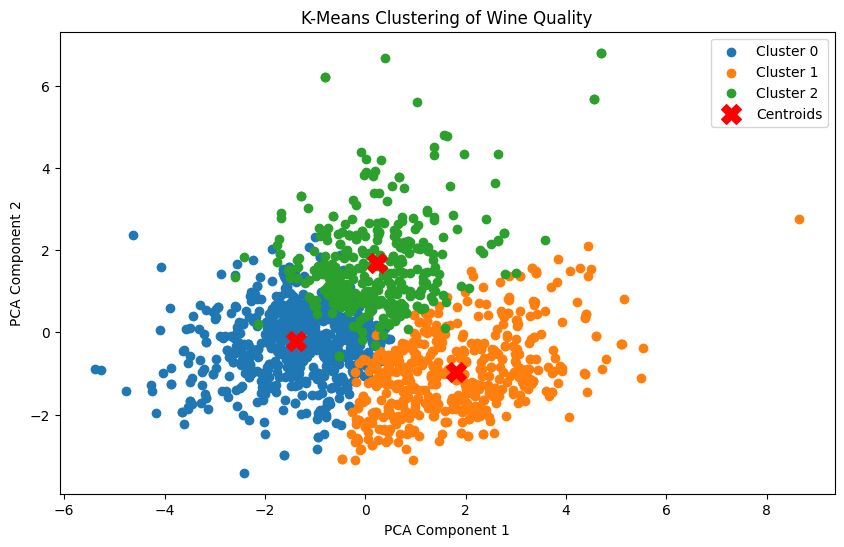

In [ ]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = pca_features[data['Cluster'] == cluster] # 클러스터 값에 따라 데이터 추출, pca_features와 data의 행 갯수가 동일하여 data['Cluster] == cluster 형식으로 인덱스 접근 가능
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')


# 클러스터 중심 시각화
centroids = kmeans.cluster_centers_
pca_centroids = pca.transform(centroids)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering of Wine Quality')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()